In [25]:
import functools
import operator
import os
import random
import typing as t
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

In [26]:
tqdm.pandas()

In [27]:
DATA_DIR = Path(os.path.expanduser('~/jigsaw-toxic/data'))
UNINTENDED_BIAS_IN_TOXICITY_SRC_DIR = DATA_DIR / 'jigsaw-unintended-bias-in-toxicity-classification'
JIGSAW_TOXIC_SEVERITY_RATING_DIR = DATA_DIR / 'jigsaw-toxic-severity-rating'
UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR = DATA_DIR / 'datasets/ubtc'

In [ ]:
!mkdir -p $UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR

In [24]:
!cp $UNINTENDED_BIAS_IN_TOXICITY_SRC_DIR/train.csv $UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR/train.csv

In [ ]:
!cp $JIGSAW_TOXIC_SEVERITY_RATING_DIR/valid.csv $UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR/valid.csv

In [20]:
valid_df = pd.read_csv(str(UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR / 'valid.csv'))

In [21]:
valid_df

,less_toxic,more_toxic,certainty
0,"I think people say its not so absurd, because ...",Re Vandalism. . . . that is because the user ...,0.666667
1,You must have the lowest IQ of anyone on wikip...,Wha's a reliable source mike? Something that c...,1.000000
2,"Thanks for removing more of his anonymous, un...","To Bad\nyou dont have the balls to sign in, I ...",1.000000
3,"""\n\nActually, it clearly does not involve pow...",", 18 November 2006 (UTC)\n\nWell comrade. Look...",0.666667
4,You are not cool \n\nYou are the most hated f...,"""== Hey Fuck-head==\nHey, just wanted to say ""...",1.000000
...,...,...,...
10103,Heeeeeeeeeeeeeeyyyyyyyyyyyy dude! Sup!,you deleted my page \nand i am extrememly mad ...,1.000000
10104,ATTENTION:''''''\n\nANYONE WHO OPPOSES MY OPIN...,suck dick u disrespectful swearing wank!!,1.000000
10105,"Oh yah, and Bayerischermann is another guy try...",Thanks. Also thanks for freezing the article. ...,1.000000
10106,I had to chop out a section specifically compa...,"""\n\nHorrifyingly enough, """"ritualistic penis ...",0.666667


In [28]:
train_df = pd.read_csv(UNINTENDED_BIAS_IN_TOXICITY_SRC_DIR / 'train.csv')

In [5]:
train_df

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,...,399519,approved,0,0,0,0,0,0.0,0,66


In [5]:
train_df.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

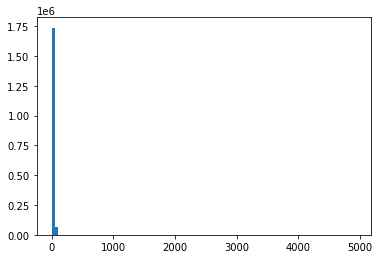

In [8]:
plt.hist(train_df['toxicity_annotator_count'], bins=100);

In [22]:
def _find_leaks(train_df: pd.DataFrame, valid_df: pd.DataFrame) -> t.Set[str]:
    train_comment_set = set(train_df['comment_text'].unique())
    valid_comment_set = set(valid_df['less_toxic'].unique()) | set(valid_df['more_toxic'].unique())
    return train_comment_set & valid_comment_set

In [23]:
leaked_set = _find_leaks(train_df, valid_df)

In [16]:
def _count_annotated_by_at_least(df: pd.DataFrame, n: int) -> t.Tuple[int, float]:
    matched_df = df[df['toxicity_annotator_count'] >= n]
    return len(matched_df), len(matched_df) / len(df)

In [27]:
_count_annotated_by_at_least(train_df, 50)

(70772, 0.03921160147467358)

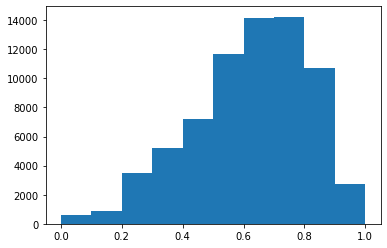

In [30]:
plt.hist(train_df[train_df['toxicity_annotator_count'] >= 50]['target']);

In [ ]:
train_df = train_df[['comment_text', 'target']]

In [ ]:
train_df

In [ ]:
train_df = train_df.rename({'target': 'score'}, axis=1)

In [ ]:
train_df

In [ ]:
plt.hist(train_df['score'], bins=50);

In [ ]:
train_df.to_csv(UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR / 'train.csv', index=False)

In [ ]:
!ls -la $UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR

In [ ]:
train_df

In [ ]:
train_df.columns

In [6]:
def display_label_distribution(df: pd.DataFrame, label_list: t.List[str]):
    fig, axs = plt.subplots(len(label_list), 2, figsize=(18, 4 * len(label_list)))
    for i, label in enumerate(label_list):
        axs[i][0].hist(df[label], bins=20);
        axs[i][0].set_title(label)
        axs[i][1].hist(df[df[label] > 0][label], bins=20);
        axs[i][1].set_title(f'{label} without zero')

In [30]:
ALL_CLS_LIST = [
    'target', 'severe_toxicity', 'obscene',
    'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
    'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
    'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
    'jewish', 'latino', 'male', 'muslim', 'other_disability',
    'other_gender', 'other_race_or_ethnicity', 'other_religion',
    'other_sexual_orientation', 'physical_disability',
    'psychiatric_or_mental_illness', 'transgender', 'white', 'sexual_explicit'
]
TOXIC_ONLY_CLS_LIST = [
    'target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit'
]

In [23]:
len(ALL_CLS_LIST)

31

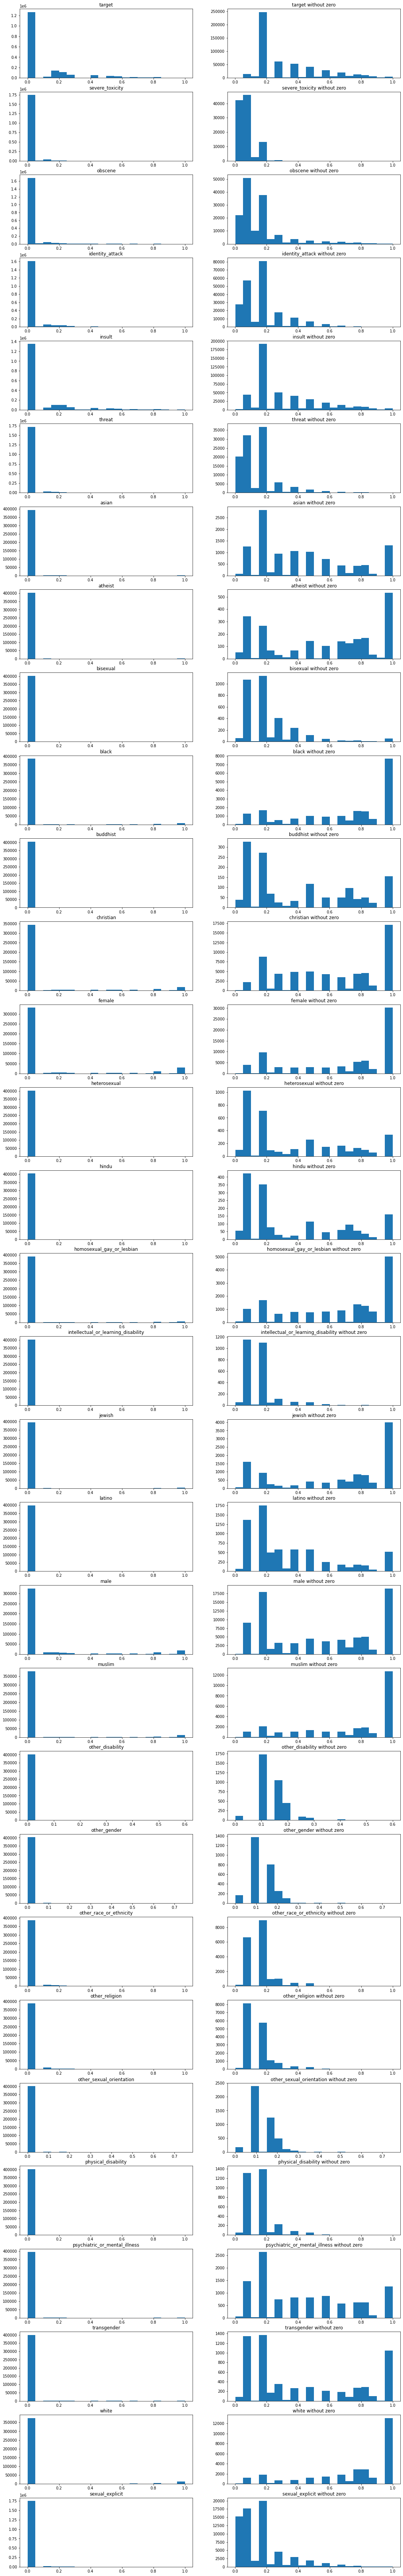

In [9]:
display_label_distribution(train_df, ALL_CLS_LIST)

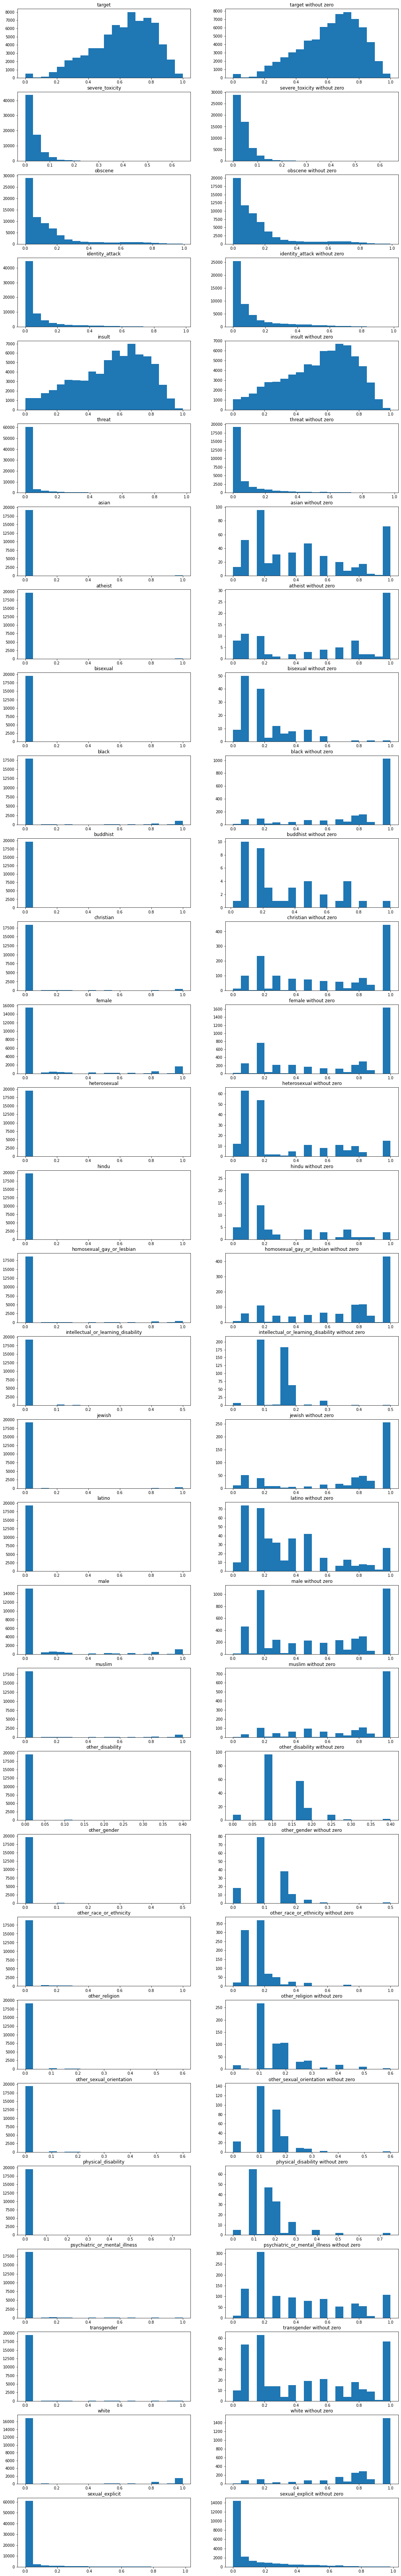

In [11]:
display_label_distribution(train_df[train_df['toxicity_annotator_count'] >= 50], ALL_CLS_LIST)

In [12]:
train_df.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [8]:
def sample_one_with_label(df: pd.DataFrame, label: str, threshold: float = 0.0):
    row = df[df[label] > threshold].sample(n=1).iloc[0]
    print(row[label])
    print(row['comment_text'])

In [ ]:
sample_one_with_label(train_df, label='physical_disability', threshold=0.5)

In [13]:
def generate_train_multilabel(df: pd.DataFrame, cls_list: t.List[str], non_toxic_frac: float) -> pd.DataFrame:
    cls_available_mask = functools.reduce(operator.iand, [~df[cls].isna() for cls in cls_list])
    df = df[cls_available_mask]
    non_toxic_mask = functools.reduce(operator.iand, [(df[cls] == 0.0) for cls in cls_list])
    toxic_df, non_toxic_df = df[~non_toxic_mask], df[non_toxic_mask]
    return pd.concat([
        toxic_df,
        non_toxic_df.sample(n=min(int(len(toxic_df) * non_toxic_frac), len(non_toxic_df)))
    ]).sample(frac=1.0).reset_index(drop=True)

In [20]:
train_multilabel_v1_df = generate_train_multilabel(train_df, cls_list=ALL_CLS_LIST, non_toxic_frac=0.1)

In [21]:
len(train_multilabel_v2_df)

590446

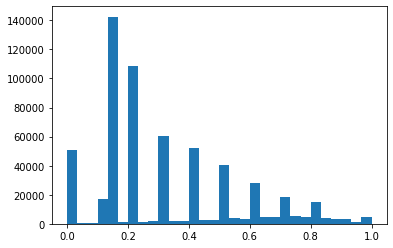

In [22]:
plt.hist(train_multilabel_v2_df['target'], bins=30);

In [ ]:
display_label_distribution(train_multilabel_df, label_list=CLS_LIST)

In [ ]:
!ls -la $UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR

In [ ]:
train_multilabel_df.to_csv(UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR / 'train_multilabel.csv', index=False)

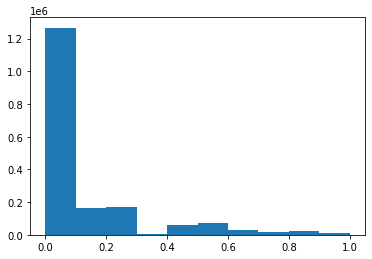

In [9]:
plt.hist(train_df['target']);

In [12]:
train_reg_df = pd.concat([
    train_df[train_df['target'] == 0.0].sample(n=25000),
    train_df[train_df['target'] > 0.0],
]).sample(frac=1.0).reset_index(drop=True)

In [14]:
train_reg_df

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,5718789,0.166667,Interesting points Mr Tatham especially the on...,0.0,0.0,0.000000,0.166667,0.0,NaN,NaN,...,363277,approved,4,0,0,2,2,0.0,0,6
1,5132046,0.200000,"""including the B.C. and federal governments, v...",0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,...,326755,approved,0,0,0,3,3,0.0,0,5
2,5781421,0.166667,interesting observation : while I am certainly...,0.0,0.0,0.000000,0.166667,0.0,NaN,NaN,...,358675,approved,0,0,0,0,0,0.0,0,6
3,5719260,0.500000,If the US had the biggest prison population in...,0.0,0.0,0.500000,0.200000,0.0,0.0,0.0,...,363161,approved,0,0,0,1,4,0.0,10,10
4,5417465,0.166667,How the Hell does The Washington Post get this...,0.0,0.0,0.166667,0.000000,0.0,NaN,NaN,...,344462,approved,0,0,0,0,0,0.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565105,6117424,0.200000,sanctimonious - you're talking about the NDP. ...,0.0,0.0,0.000000,0.200000,0.0,NaN,NaN,...,387315,approved,1,0,0,0,0,0.0,0,10
565106,971818,0.200000,Wait folks.. Sarah Palin is getting the Cdn ...,0.0,0.0,0.000000,0.200000,0.0,NaN,NaN,...,167169,approved,10,2,0,1,0,0.0,0,10
565107,4983343,0.485714,Self-absorbed twits! All of them. That include...,0.0,0.0,0.014286,0.442857,0.0,NaN,NaN,...,317686,approved,0,0,0,0,0,0.0,0,70
565108,5110134,0.200000,So the Swedish authorities will investigate al...,0.0,0.0,0.000000,0.200000,0.0,NaN,NaN,...,325490,approved,0,0,0,1,0,0.0,0,10


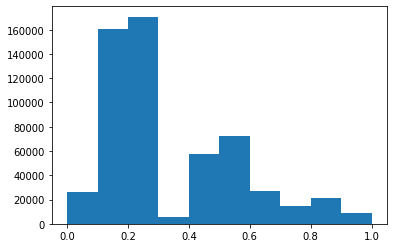

In [15]:
plt.hist(train_reg_df['target']);

In [18]:
train_reg_df.to_csv(UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR / 'train_reg_v1.csv', index=False)

In [6]:
train_reg_df = pd.read_csv(UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR / 'train_reg_v1.csv')

In [7]:
def generate_mlm_datasets_v1(df: pd.DataFrame, train_frac: float = 0.02, valid_frac: float = 0.01):
    lines = [str(row['comment_text']).replace('\n', ' ') for _, row in tqdm(train_reg_df.iterrows(), total=len(train_reg_df))]
    random.shuffle(lines)
    num_train, num_valid = int(len(lines) * train_frac), int(len(lines) * valid_frac)
    train_lines, valid_lines = lines[:num_train], lines[num_train:num_train + num_valid]
    with open(UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR / 'train_reg_v1_mlm.txt', 'w') as f:
        for line in tqdm(train_lines):
            f.write(f'{line}\n')
    with open(UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR / 'valid_reg_v1_mlm.txt', 'w') as f:
        for line in tqdm(valid_lines):
            f.write(f'{line}\n')
    

In [8]:
generate_mlm_datasets_v1(train_reg_df)

  0%|          | 0/565110 [00:00<?, ?it/s]

  0%|          | 0/11302 [00:00<?, ?it/s]

  0%|          | 0/5651 [00:00<?, ?it/s]

In [31]:
train_df[train_df['toxicity_annotator_count'] >= 50].to_csv(UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR / 'train_reg_w50.csv', index=False)

In [12]:
!cp $UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR/train_reg_w50.csv $UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR/train_multireg_w50.csv

In [31]:
def generate_cls_list(df: pd.DataFrame, min_n: int) -> t.List[str]:
    cls_list = []
    for cls in ALL_CLS_LIST:
        n = len(train_df[(train_df['toxicity_annotator_count'] >= 50) & (train_df[cls] > 0.0)])
        if n >= min_n:
            print(f'{cls}: {n}')
            cls_list.append(cls)
    return cls_list

In [32]:
cls_list_v1 = generate_cls_list(train_df, min_n=500)

target: 70743
severe_toxicity: 55498
obscene: 61832
identity_attack: 51551
insult: 70602
threat: 29553
black: 1908
christian: 1382
female: 4214
homosexual_gay_or_lesbian: 1149
jewish: 558
male: 4548
muslim: 1442
other_race_or_ethnicity: 893
other_religion: 598
psychiatric_or_mental_illness: 1111
white: 2817
sexual_explicit: 24308


In [40]:
len(train_df[train_df['toxicity_annotator_count'] >= 10]) / len(train_df[train_df['toxicity_annotator_count'] >= 50])

4.795667778217374

In [ ]:
train_df[train_df['toxicity_annotator_count'] >= 10].to_csv(UNINTENDED_BIAS_IN_TOXICITY_DATASET_DIR / 'train_multireg_w10.csv', index=False)